## Importations

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from tools import *

# First classification

In [6]:
#Creation of data

from keras.utils import np_utils
[X_train, Y_train] = generate_dataset_classification(300, 20)
Y_train = np_utils.to_categorical(Y_train, 3) 
print(Y_train.shape)


Creating data:
0
100
200
(300, 3)


### Choice of the optimizer

In [21]:
# Choose the optimizer you want to use

optimizer_choice = 'adam'
#optimizer_choice = 'sgd'

In [22]:
#Definition of the first network

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.optimizers import SGD

nb_neurons=15
sgd = SGD(lr=0.01,decay=1e-6, momentum=0.9, nesterov=True) 
    
model = Sequential([
    Dense(nb_neurons, input_shape=(X_train[0].shape[0],)),
    Activation('sigmoid'),
    Dense(3),
    Activation('sigmoid')
    
])

#Entrainement du réseau avec sgd
if optimizer_choice == 'adam':
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam')

    model.fit(X_train, Y_train, batch_size=32, epochs=30, verbose=1)
elif optimizer_choice == 'sgd':
    model.compile(loss='categorical_crossentropy',
                  optimizer=sgd)

    model.fit(X_train, Y_train, batch_size=32, epochs=30, verbose=1)

Epoch 1/30
300/300 [==============================] - 1s 4ms/step - loss: 1.0581
Epoch 2/30
300/300 [==============================] - 0s 521us/step - loss: 0.8885
Epoch 3/30
300/300 [==============================] - 0s 573us/step - loss: 0.8073
Epoch 4/30
300/300 [==============================] - 0s 625us/step - loss: 0.7595
Epoch 5/30
300/300 [==============================] - 0s 573us/step - loss: 0.7219
Epoch 6/30
300/300 [==============================] - 0s 625us/step - loss: 0.6993
Epoch 7/30
300/300 [==============================] - 0s 625us/step - loss: 0.6744
Epoch 8/30
300/300 [==============================] - 0s 677us/step - loss: 0.6536
Epoch 9/30
300/300 [==============================] - 0s 573us/step - loss: 0.6317
Epoch 10/30
300/300 [==============================] - 0s 573us/step - loss: 0.6081
Epoch 11/30
300/300 [==============================] - 0s 573us/step - loss: 0.5893
Epoch 12/30
300/300 [==============================] - 0s 573us/step - loss: 0.5714
Epo

In [20]:
X_test = generate_a_rectangle()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[0.3390938 , 0.02227835, 0.00880824]], dtype=float32)

The results are better with the $sgd$ optimizer : the loss functin takes values really inferior to $Adam$. For example, after 30 iterations, we get an average loss of $0.15$ for $sgd$ and $0.3$ for $Adam$.

We print the weigths computed after training of the network. 
We see directly on the weights the shape of the geometrical objects we want to classify. Indeed, the weights compute the borders of the geometrical objects, by calculating difference (gradients), where borders are expected to be.
Some of the neurons are fully noisy, meaning that they didn't learn anything.

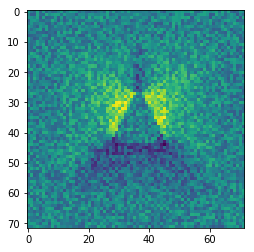

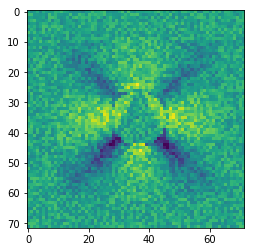

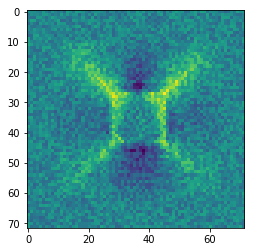

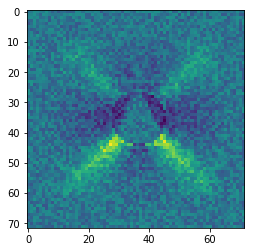

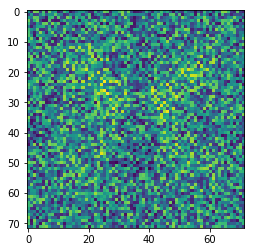

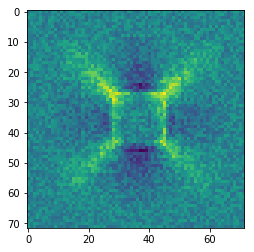

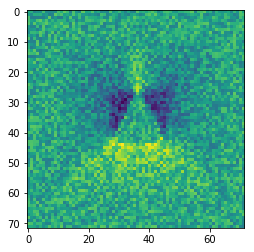

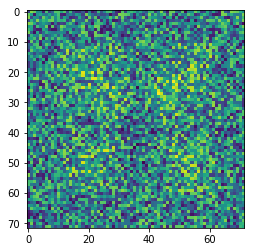

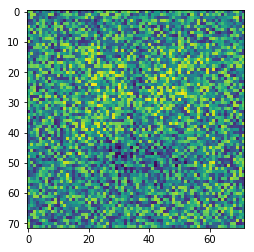

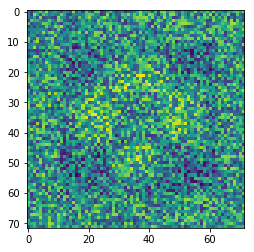

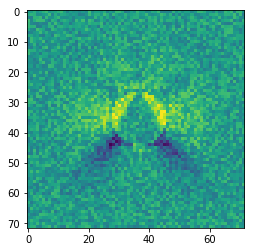

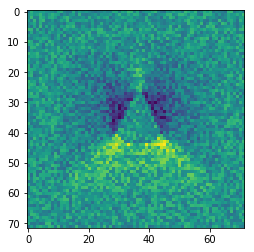

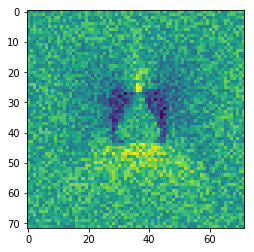

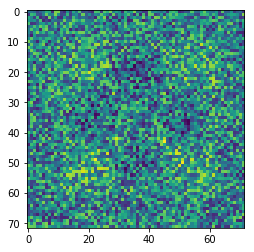

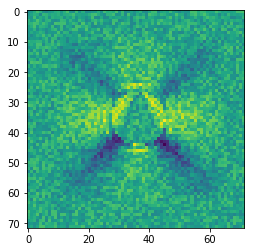

In [23]:
for i in range(nb_neurons):
    plt.imshow(model.get_weights()[0][:,i].reshape(72,72))
    plt.show()

# A more difficult classification problem

In [29]:
# Creating data

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

# input image dimensions
img_rows, img_cols = 72, 72

# the data, split between train and test sets
[X_train, Y_train] = generate_dataset_classification(800, 20, True)
[X_test, Y_test] = generate_test_set_classification()

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

Y_train = np_utils.to_categorical(Y_train, 3)
    
print(input_shape)
    
print('The shape of x_train is:', X_train.shape)
print('The shape of y_train is:', Y_train.shape)
print('The shape of x_test is:', X_test.shape)
print('The shape of y_test is:', Y_test.shape)
print('There are ', X_train.shape[0], 'train samples')
print('There are ', X_test.shape[0], 'test samples')


Creating data:
0
100
200
300
400
500
600
700
Creating data:
0
100
200
(72, 72, 1)
The shape of x_train is: (800, 72, 72, 1)
The shape of y_train is: (800, 3)
The shape of x_test is: (300, 72, 72, 1)
The shape of y_test is: (300, 3)
There are  800 train samples
There are  300 test samples


In [30]:
#Definition of the network

batch_size = 32
epochs = 20
sgd = SGD(lr=0.01,decay=1e-6, momentum=0.9, nesterov=True) 


model_complexe = Sequential()
model_complexe.add(Conv2D(16, kernel_size=(5, 5),
                   activation='relu',
                   input_shape=input_shape))
model_complexe.add(MaxPooling2D(pool_size=(4, 4)))
model_complexe.add(Flatten())
model_complexe.add(Dense(32))
model_complexe.add(Activation('relu'))
model_complexe.add(Dropout(0.25))
model_complexe.add(Dense(3))
model_complexe.add(Activation('softmax'))

In [31]:
# Training
model_complexe.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_complexe.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)

Epoch 1/20
800/800 [==============================] - 9s 12ms/step - loss: 1.0801 - acc: 0.4250
Epoch 2/20
800/800 [==============================] - 8s 10ms/step - loss: 0.9129 - acc: 0.5962
Epoch 3/20
800/800 [==============================] - 9s 11ms/step - loss: 0.8041 - acc: 0.6713
Epoch 4/20
800/800 [==============================] - 9s 11ms/step - loss: 0.7163 - acc: 0.7037
Epoch 5/20
800/800 [==============================] - 8s 10ms/step - loss: 0.6827 - acc: 0.7087
Epoch 6/20
800/800 [==============================] - 8s 10ms/step - loss: 0.6075 - acc: 0.7675
Epoch 7/20
800/800 [==============================] - 8s 10ms/step - loss: 0.5689 - acc: 0.7700
Epoch 8/20
800/800 [==============================] - 8s 10ms/step - loss: 0.5244 - acc: 0.7975
Epoch 9/20
800/800 [==============================] - 9s 11ms/step - loss: 0.4807 - acc: 0.8350
Epoch 10/20
800/800 [==============================] - 8s 10ms/step - loss: 0.4351 - acc: 0.8538
Epoch 11/20
800/800 [==================

In [32]:
#Evaluation on the test dataset

score = model_complexe.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

300/300 [==============================] - 2s 7ms/step
Test loss: 0.3222678542137146
Test accuracy: 0.8933333325386047


We needed a much bigger network, and not only fully connected layers but also convolution to learn this task. Indeed, geometrical objects can now be anywhere in the image, so it is important to have patches that get informations all over the image.

# A regresion problem

In [33]:
# Creation of the dataset

[X_train_regr, Y_train_regr] = generate_dataset_regression(1000, 0)
[X_test_regr, Y_test_regr] = generate_test_set_regression()

img_rows, img_cols = 72, 72
X_test_regr = X_test_regr.reshape(X_test_regr.shape[0], img_rows, img_cols, 1)
X_train_regr = X_train_regr.reshape(X_train_regr.shape[0], img_rows, img_cols, 1)

Creating data:
0
100
200
300
400
500
600
700
800
900
Creating data:
0
100
200


We define an order function to havec a bijection between the regression and the points of the input label. 
The input label is now always sorted, so a regression can only be reached by an only triplet of points.

In [290]:
def order(Y):
    New_Y = np.zeros((Y.shape[0], Y.shape[1]))
    for i, y in enumerate(Y):
        y = y.reshape((3,2))
        y = y[y[:,0].argsort()]
        New_Y[i,:] = y.reshape(6)
    return(New_Y)

Y_train_regr_norm = order(Y_train_regr)
Y_test_regr_norm = order(Y_test_regr)

In [291]:
batch_size = 32
epochs = 20
sgd = SGD(lr=0.01,decay=1e-6, momentum=0.9, nesterov=True) 


model_complexe = Sequential()
model_complexe.add(Conv2D(16, kernel_size=(5, 5),
                   activation='relu',
                   input_shape=input_shape))

model_complexe.add(Conv2D(32, kernel_size=(3, 3),
                   activation='relu',
                   input_shape=input_shape))
model_complexe.add(MaxPooling2D(pool_size=(2, 2)))

model_complexe.add(Flatten())
model_complexe.add(Dropout(0.25))
model_complexe.add(Dense(64))
model_complexe.add(Activation('relu'))
model_complexe.add(Dense(6))

model_complexe.compile(loss='mean_squared_error',
              optimizer=sgd,
              metrics=['accuracy'])

In [295]:
model_complexe.fit(X_train_regr, Y_train_regr_norm,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)

Epoch 1/20
1000/1000 [==============================] - 33s 33ms/step - loss: 0.0207 - acc: 0.6780
Epoch 2/20
1000/1000 [==============================] - 33s 33ms/step - loss: 0.0198 - acc: 0.6830
Epoch 3/20
1000/1000 [==============================] - 33s 33ms/step - loss: 0.0188 - acc: 0.7050
Epoch 4/20
1000/1000 [==============================] - 35s 35ms/step - loss: 0.0175 - acc: 0.7060
Epoch 5/20
1000/1000 [==============================] - 33s 33ms/step - loss: 0.0165 - acc: 0.7160
Epoch 6/20
1000/1000 [==============================] - 34s 34ms/step - loss: 0.0159 - acc: 0.7180
Epoch 7/20
1000/1000 [==============================] - 34s 34ms/step - loss: 0.0148 - acc: 0.7290
Epoch 8/20


KeyboardInterrupt: 

In [296]:
score = model_complexe.evaluate(X_test_regr, Y_test_regr_norm, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

300/300 [==============================] - 4s 13ms/step
Test loss: 0.02643416593472163
Test accuracy: 0.66


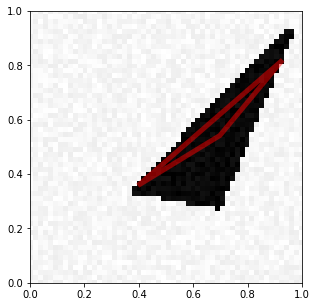

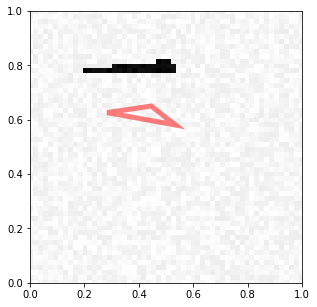

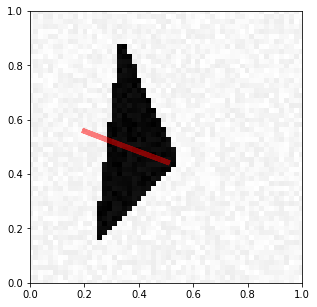

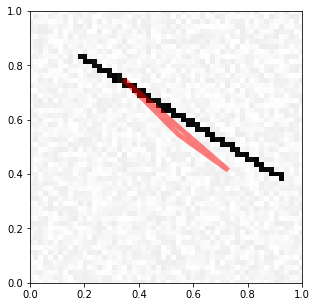

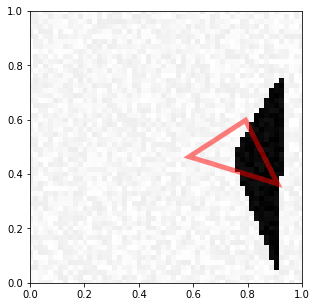

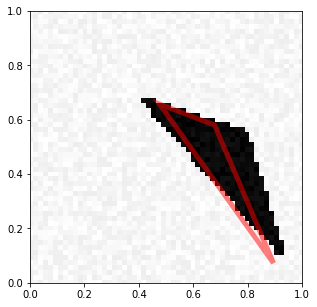

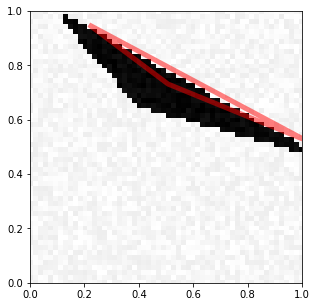

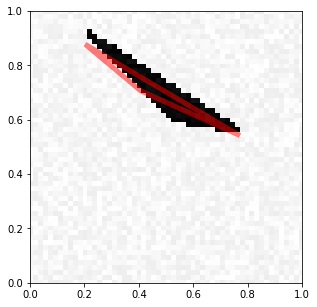

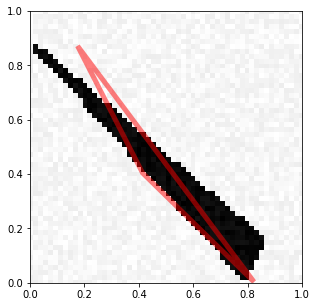

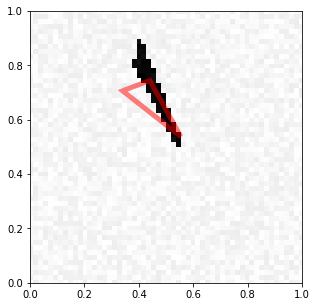

In [297]:
for i in range(10):
    visualize_prediction(X_test_regr[i], model_complexe.predict(X_test_regr[i].reshape(1,img_rows, img_cols, 1)))

In [287]:
model_complexe.predict(X_test_regr[0].reshape(1,img_rows, img_cols, 1))

array([[0.507979  , 0.54672235, 0.7236192 , 0.527765  , 0.887243  ,
        0.57013285]], dtype=float32)

In [288]:
Y_test_regr_norm[0]

array([0.36340393, 0.33217252, 0.67661723, 0.27556678, 0.94133439,
       0.93818117])